# Circuit CS_R2CL

In [5]:
import dataprocessing.readtools as dtp_read
import dataprocessing.plottools as dtp_plot
from dataprocessing.timeseries import TimeSeries as ts

## DPsim EMT

In [6]:
# DPsim EMT simulation
import dpsim

name = 'EMT_CS_R2CL'

# Nodes
gnd = dpsim.emt.Node.GND()
n1 = dpsim.emt.Node('n1')
n2 = dpsim.emt.Node('n2')

# Components
cs = dpsim.emt.ph1.CurrentSource('cs')
cs.I_ref = complex(10,0)
cs.f_src = 50
r1 = dpsim.emt.ph1.Resistor('r_1');
r1.R = 1;
c1 = dpsim.emt.ph1.Capacitor('c_1');
c1.C = 0.001;
l1 = dpsim.emt.ph1.Inductor('l_1');
l1.L = 0.001;
r2 = dpsim.emt.ph1.Resistor('r_2');
r2.R = 1;

# Connections
cs.connect([gnd, n1])
r1.connect([n1, gnd])
c1.connect([n1, n2]);
l1.connect([n2, gnd]);
r2.connect([n2, gnd]);

# Define system topology
system = dpsim.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2]);

# Logging
logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v');
logger.log_attribute(n2, 'v');
logger.log_attribute(cs, 'i_intf');
logger.log_attribute(c1, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True, sim_type=1)
sim.add_logger(logger)

sim.start()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [9]:
# read EMT results
#work_dir = '../../dpsim/Logs/'
work_dir = 'Logs/'
log_name = 'EMT_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = dtp_read.read_timeseries_dpsim(work_dir + log_name + '.csv')

Logs/EMT_CS_R2CL.csv
DPsim results real column names: ['c_1.i_intf', 'cs.i_intf', 'n1.v', 'n2.v']
DPsim results complex column names: []
DPsim results variable number: 4
DPsim results length: 1000


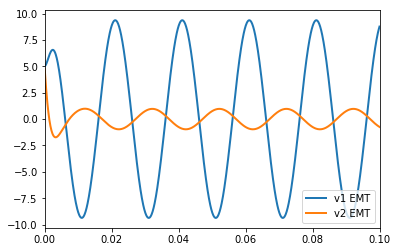

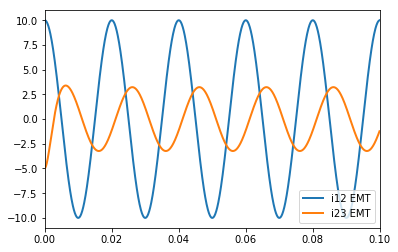

In [12]:
#v1 = 'v1'
#v2 = 'v2'
#v3 = 'v3'
#i12 = 'i12'
#i23 = 'i23'
v1 = 'n1.v'
v2 = 'n2.v'
i12 = 'cs.i_intf'
i23 = 'c_1.i_intf'

dtp_plot.set_timeseries_labels(ts_dpsim_emt[v1], 'v1 EMT')
dtp_plot.set_timeseries_labels(ts_dpsim_emt[v2], 'v2 EMT')
dtp_plot.set_timeseries_labels(ts_dpsim_emt[i12], 'i12 EMT')
dtp_plot.set_timeseries_labels(ts_dpsim_emt[i23], 'i23 EMT')
dtp_plot.plot_timeseries(1, ts_dpsim_emt[v1])
dtp_plot.plot_timeseries(1, ts_dpsim_emt[v2])
dtp_plot.plot_timeseries(2, ts_dpsim_emt[i12])
dtp_plot.plot_timeseries(2, ts_dpsim_emt[i23])

## DPsim DP

In [13]:
# DPsim DP simulation
import dpsim

name = 'DP_CS_R2CL'

# Nodes
gnd = dpsim.dp.Node.GND()
n1 = dpsim.dp.Node('n1')
n2 = dpsim.dp.Node('n2')

# Components
cs = dpsim.dp.ph1.CurrentSource('cs')
cs.I_ref = complex(10,0)
r1 = dpsim.dp.ph1.Resistor('r_1');
r1.R = 1;
c1 = dpsim.dp.ph1.Capacitor('c_1');
c1.C = 0.001;
l1 = dpsim.dp.ph1.Inductor('l_1');
l1.L = 0.001;
r2 = dpsim.dp.ph1.Resistor('r_2');
r2.R = 1;

# Connections
cs.connect([gnd, n1])
r1.connect([n1, gnd])
c1.connect([n1, n2]);
l1.connect([n2, gnd]);
r2.connect([n2, gnd]);

# Define system topology
system = dpsim.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2]);

# Logging
logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v');
logger.log_attribute(n2, 'v');
logger.log_attribute(cs, 'i_intf');
logger.log_attribute(c1, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True)
sim.add_logger(logger)

sim.start()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [15]:
# read DP results
#work_dir = '../../dpsim/Logs/'
work_dir = 'Logs/'
log_name = 'DP_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = dtp_read.read_timeseries_dpsim(work_dir + log_name + '.csv')

Logs/DP_CS_R2CL.csv
DPsim results real column names: []
DPsim results complex column names: ['c_1.i_intf', 'cs.i_intf', 'n1.v', 'n2.v']
DPsim results variable number: 4
DPsim results length: 1000


In [16]:
#convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

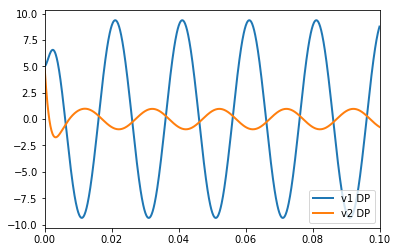

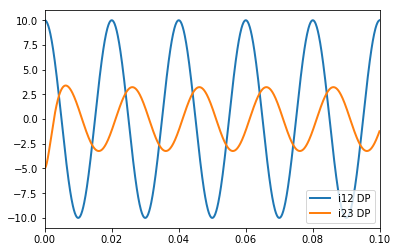

In [17]:
#v1 = 'v1'
#v2 = 'v2'
#i12 = 'i12'
#i23 = 'i23'
v1 = 'n1.v'
v2 = 'n2.v'
i12 = 'cs.i_intf'
i23 = 'c_1.i_intf'

dtp_plot.set_timeseries_labels(ts_dpsim_dp_emt[v1], 'v1 DP')
dtp_plot.set_timeseries_labels(ts_dpsim_dp_emt[v2], 'v2 DP')
dtp_plot.set_timeseries_labels(ts_dpsim_dp_emt[i12], 'i12 DP')
dtp_plot.set_timeseries_labels(ts_dpsim_dp_emt[i23], 'i23 DP')
dtp_plot.plot_timeseries(1, ts_dpsim_dp_emt[v1])
dtp_plot.plot_timeseries(1, ts_dpsim_dp_emt[v2])
dtp_plot.plot_timeseries(2, ts_dpsim_dp_emt[i12])
dtp_plot.plot_timeseries(2, ts_dpsim_dp_emt[i23])

## Simulink reference results

In [26]:
# read Simulink log file
work_dir = '../../results/Simulink/Circuits/'
log_name = 'SL_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_sl = read_timeseries_simulink(work_dir + log_name + '.csv')

../../results/Simulink/Circuits/SL_CS_R2CL.csv
Simulink results real column names: ['v1', 'v2', 'i12', 'i34']
Simulink results complex column names: []
Simulink results variable number: 4
Simulink results length: 1001


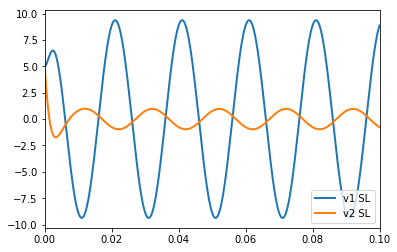

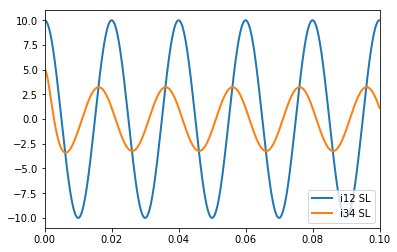

In [27]:
set_timeseries_labels(ts_sl['v1'], 'v1 SL')
set_timeseries_labels(ts_sl['v2'], 'v2 SL')
set_timeseries_labels(ts_sl['i12'], 'i12 SL')
set_timeseries_labels(ts_sl['i34'], 'i34 SL')
plot_timeseries(1, ts_sl['v1'])
plot_timeseries(1, ts_sl['v2'])
plot_timeseries(2, ts_sl['i12'])
plot_timeseries(2, ts_sl['i34'])

## Comparison

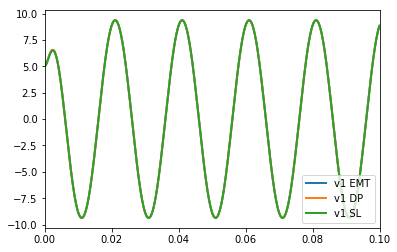

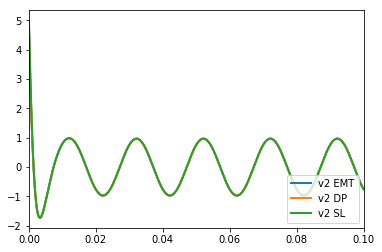

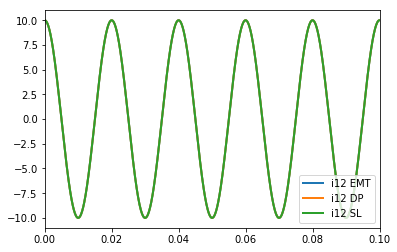

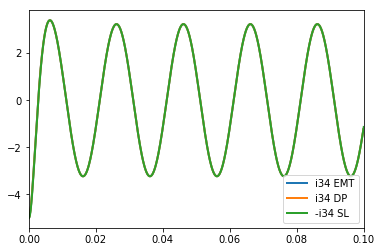

In [29]:
# plot v1
plot_timeseries(1, ts_dpsim_emt['v1'])
plot_timeseries(1, ts_dpsim_dp_emt['v1'])
plot_timeseries(1, ts_sl['v1'])
# plot v2
plot_timeseries(2, ts_dpsim_emt['v2'])
plot_timeseries(2, ts_dpsim_dp_emt['v2'])
plot_timeseries(2, ts_sl['v2'])
# plot i12
plot_timeseries(5, ts_dpsim_emt['i12'])
plot_timeseries(5, ts_dpsim_dp_emt['i12'])
plot_timeseries(5, ts_sl['i12'])
# plot i34
plot_timeseries(6, ts_dpsim_emt['i34'])
plot_timeseries(6, ts_dpsim_dp_emt['i34'])
plot_timeseries(6, ts_sl['i34'].scale('-i34 SL', -1))

In [31]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += TimeSeries.rmse(ts_sl['v1'], ts_dpsim_emt['v1'])
err_sl_emt += TimeSeries.rmse(ts_sl['v2'], ts_dpsim_emt['v2'])
err_sl_emt = err_sl_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += TimeSeries.rmse(ts_sl['v1'], ts_dpsim_dp_emt['v1'])
err_sl_dp += TimeSeries.rmse(ts_sl['v2'], ts_dpsim_dp_emt['v2'])
err_sl_dp = err_sl_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.0170379
Total RMSE of Simulink reference and DPsim DP: 0.0170345
